### __Hyperparameter Tuning Experiment - GridSearchCV__
> - Test GradSearch on classification data & models
> - The following is tested:
    * Running Time
    * Best Parameters Determined
    * Performance Test

#### Reference Links:
> - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html


In [1]:
#import the required packages here
# import libraries
import numpy as np
import pandas as pd
import io
from datetime import datetime, timezone, timedelta
import datetime as dt
import time
from collections import Counter
from PIL import Image


# import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
#plt.imshow(mpimg.imread('jan_aug_tempanom.png'))

# import seaborn
import seaborn as sns

# import plotly graph objects
import plotly.graph_objs as go
import plotly.express as px


# import scipy.cluster.hierarchy
import scipy
import scipy.linalg as la
import scipy.cluster.hierarchy as sch
from scipy.cluster.vq import whiten, kmeans, vq
from scipy.stats import multivariate_normal
from pathlib import Path

import statsmodels.api as sm

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import sklearn.model_selection as model_selection
import sklearn.model_selection as cross_validation
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import log_loss
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import average_precision_score, f1_score, classification_report
from sklearn.metrics import plot_precision_recall_curve, plot_confusion_matrix
from sklearn import linear_model, datasets
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier 

import xgboost as xgb

#for showing 2D plot
%matplotlib inline 

# to be able to see multiple ouputs from sungle cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### __Import data from sklearn__
> - https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer

In [2]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [4]:
data.feature_names
print('\n')
data.target_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

array(['malignant', 'benign'], dtype='<U9')

In [15]:
# start time to measure the time of the program execution
start_time = time.time()

# make breast_cancer data into dataframe
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# add row indes as id
df = df.reset_index()

# check
df.info()
df

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   index                    569 non-null    int64  
 1   mean radius              569 non-null    float64
 2   mean texture             569 non-null    float64
 3   mean perimeter           569 non-null    float64
 4   mean area                569 non-null    float64
 5   mean smoothness          569 non-null    float64
 6   mean compactness         569 non-null    float64
 7   mean concavity           569 non-null    float64
 8   mean concave points      569 non-null    float64
 9   mean symmetry            569 non-null    float64
 10  mean fractal dimension   569 non-null    float64
 11  radius error             569 non-null    float64
 12  texture error            569 non-null    float64
 13  perimeter error          569 non-null    float64
 14  area error               5

,index,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0




--- 0.022649765014648438 seconds ---


#### __Make target class in dataset balance__

In [16]:
# start time to measure the time of the program execution
start_time = time.time()

# check target balance
print("counts of target class")
df['target'].value_counts()

# check the proportion of target class
print("\nproportion of target class")
df['target'].value_counts()/len(df)

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

counts of target class


1    357
0    212
Name: target, dtype: int64


proportion of target class


1    0.627417
0    0.372583
Name: target, dtype: float64



--- 0.0175778865814209 seconds ---


In [23]:
(df['target'].value_counts()/len(df))[0]
(df['target'].value_counts()/len(df))[1]

0.37258347978910367

0.6274165202108963

<Figure size 720x720 with 0 Axes>

Text(0, 0.5, '%')

Text(0.5, 1.0, 'Target Class Balance')

[Text(0, 0, '37.26'), Text(0, 0, '62.74')]

<Figure size 720x720 with 0 Axes>

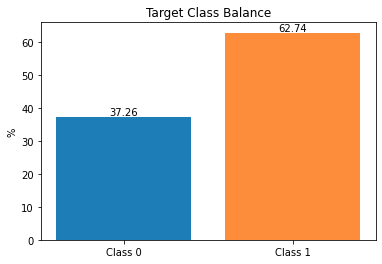



--- 0.12021350860595703 seconds ---


In [24]:
# Plot Bar Plot of Target Class - before balancing train data

# start time to measure the time of the program execution
start_time = time.time()

plt.figure(figsize=(10,10))
fig, ax = plt.subplots()

# creating the dataset
data = {'Class 0': round((df['target'].value_counts()/len(df))[0]*100, 2), 
        'Class 1': round((df['target'].value_counts()/len(df))[1]*100, 2)}
classes = list(data.keys())
values = list(data.values())

cmap_blue = plt.cm.get_cmap('GnBu')
blue = cmap_blue(0.8)

cmap_org = plt.cm.get_cmap('Oranges')
orange = cmap_org(0.5)

p1 = ax.bar(classes, values, color=[blue, orange])
ax.set_ylabel('%')
ax.set_title('Target Class Balance')
ax.set_xticks(classes)

# Label with label_type 'center' instead of the default 'edge'
ax.bar_label(p1)

plt.show()

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

In [21]:
# start time to measure the time of the program execution
start_time = time.time()

# get data with target = 1 to be dropped
drop_df = df[df['target'] == 1]
drop_df = drop_df.sample(n=125, random_state=42)

# KEEP ONLY THOSE WHO ARE NOT IN THE TEST SET
train_df = df[~df.index.isin(drop_df.index.tolist())]

# check
train_df.info()
train_df

# checking balance of target class
train_df['target'].value_counts()                 # in numbers
train_df['target'].value_counts()/len(train_df)   # in %

# print each target class proportion in %
perc_0 = (train_df['target'].value_counts()/len(train_df))[0]
perc_1 = (train_df['target'].value_counts()/len(train_df))[1]

print(f"\ntarget class 0 = {round(perc_0*100, 2)} % | target class 1 = {round(perc_1*100, 2)} %")

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 444 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   index                    444 non-null    int64  
 1   mean radius              444 non-null    float64
 2   mean texture             444 non-null    float64
 3   mean perimeter           444 non-null    float64
 4   mean area                444 non-null    float64
 5   mean smoothness          444 non-null    float64
 6   mean compactness         444 non-null    float64
 7   mean concavity           444 non-null    float64
 8   mean concave points      444 non-null    float64
 9   mean symmetry            444 non-null    float64
 10  mean fractal dimension   444 non-null    float64
 11  radius error             444 non-null    float64
 12  texture error            444 non-null    float64
 13  perimeter error          444 non-null    float64
 14  area error               4

,index,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


1    232
0    212
Name: target, dtype: int64

1    0.522523
0    0.477477
Name: target, dtype: float64


target class 0 = 47.75 % | target class 1 = 52.25 %


--- 0.026493549346923828 seconds ---


In [20]:
(df['target'].value_counts()/len(df))[1]

0.6274165202108963

<Figure size 720x720 with 0 Axes>

Text(0, 0.5, '%')

Text(0.5, 1.0, 'Target Class Balance')

[Text(0, 0, '47.75'), Text(0, 0, '52.25')]

<Figure size 720x720 with 0 Axes>

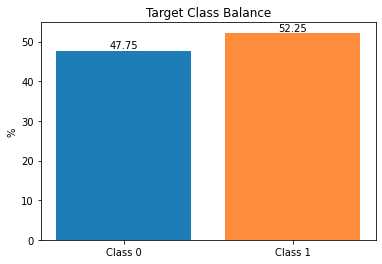



--- 0.0702674388885498 seconds ---


In [25]:
# Plot Bar Plot of Target Class - after balancing train data

# start time to measure the time of the program execution
start_time = time.time()

plt.figure(figsize=(10,10))
fig, ax = plt.subplots()

# creating the dataset
data = {'Class 0': round(perc_0*100, 2), 
        'Class 1': round(perc_1*100, 2)}
classes = list(data.keys())
values = list(data.values())

cmap_blue = plt.cm.get_cmap('GnBu')
blue = cmap_blue(0.8)

cmap_org = plt.cm.get_cmap('Oranges')
orange = cmap_org(0.5)

p1 = ax.bar(classes, values, color=[blue, orange])
ax.set_ylabel('%')
ax.set_title('Target Class Balance')
ax.set_xticks(classes)

# Label with label_type 'center' instead of the default 'edge'
ax.bar_label(p1)

plt.show()

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

#### __Divide data to train and test data__
> - Total entries in data  = 444
> - train data = 344 entries
> - test data = 100 entries

In [26]:
# start time to measure the time of the program execution
start_time = time.time()

# get data with target = 1 to be dropped
test_df = train_df.sample(n=100, random_state=42)

# KEEP ONLY THOSE WHO ARE NOT IN THE TEST SET
train_df = train_df[~train_df.index.isin(test_df.index.tolist())]

# check
train_df.info()
train_df

test_df.info()
test_df

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 344 entries, 1 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   index                    344 non-null    int64  
 1   mean radius              344 non-null    float64
 2   mean texture             344 non-null    float64
 3   mean perimeter           344 non-null    float64
 4   mean area                344 non-null    float64
 5   mean smoothness          344 non-null    float64
 6   mean compactness         344 non-null    float64
 7   mean concavity           344 non-null    float64
 8   mean concave points      344 non-null    float64
 9   mean symmetry            344 non-null    float64
 10  mean fractal dimension   344 non-null    float64
 11  radius error             344 non-null    float64
 12  texture error            344 non-null    float64
 13  perimeter error          344 non-null    float64
 14  area error               3

,index,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.07017,0.1812,...,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902,0
2,2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.12790,0.2069,...,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758,0
3,3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.10520,0.2597,...,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300,0
4,4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.10430,0.1809,...,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678,0
5,5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.08089,0.2087,...,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556,556,10.16,19.59,64.73,311.7,0.10030,0.07504,0.005025,0.01116,0.1791,...,22.88,67.88,347.3,0.12650,0.12000,0.01005,0.02232,0.2262,0.06742,1
560,560,14.05,27.15,91.38,600.4,0.09929,0.11260,0.044620,0.04304,0.1537,...,33.17,100.20,706.7,0.12410,0.22640,0.13260,0.10480,0.2250,0.08321,1
562,562,15.22,30.62,103.40,716.9,0.10480,0.20870,0.255000,0.09429,0.2128,...,42.79,128.70,915.0,0.14170,0.79170,1.17000,0.23560,0.4089,0.14090,0
565,565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.144000,0.09791,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.32150,0.16280,0.2572,0.06637,0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 418 to 112
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   index                    100 non-null    int64  
 1   mean radius              100 non-null    float64
 2   mean texture             100 non-null    float64
 3   mean perimeter           100 non-null    float64
 4   mean area                100 non-null    float64
 5   mean smoothness          100 non-null    float64
 6   mean compactness         100 non-null    float64
 7   mean concavity           100 non-null    float64
 8   mean concave points      100 non-null    float64
 9   mean symmetry            100 non-null    float64
 10  mean fractal dimension   100 non-null    float64
 11  radius error             100 non-null    float64
 12  texture error            100 non-null    float64
 13  perimeter error          100 non-null    float64
 14  area error              

,index,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
418,418,12.70,12.17,80.88,495.0,0.08785,0.05794,0.023600,0.024020,0.1583,...,16.92,88.12,566.9,0.13140,0.16070,0.09385,0.08224,0.2775,0.09464,1
170,170,12.32,12.39,78.85,464.1,0.10280,0.06981,0.039870,0.037000,0.1959,...,15.64,86.97,549.1,0.13850,0.12660,0.12420,0.09391,0.2827,0.06771,1
84,84,12.00,15.65,76.95,443.3,0.09723,0.07165,0.041510,0.018630,0.2079,...,24.90,87.78,567.9,0.13770,0.20030,0.22670,0.07632,0.3379,0.07924,1
456,456,11.63,29.29,74.87,415.1,0.09357,0.08574,0.071600,0.020170,0.1799,...,38.81,86.04,527.8,0.14060,0.20310,0.29230,0.06835,0.2884,0.07220,1
85,85,18.46,18.52,121.10,1075.0,0.09874,0.10530,0.133500,0.087950,0.2132,...,27.68,152.20,1603.0,0.13980,0.20890,0.31570,0.16420,0.3695,0.08579,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,375,16.17,16.07,106.30,788.5,0.09880,0.14380,0.066510,0.053970,0.1990,...,19.14,113.10,861.5,0.12350,0.25500,0.21140,0.12510,0.3153,0.08960,1
307,307,9.00,14.40,56.36,246.3,0.07005,0.03116,0.003681,0.003472,0.1788,...,20.07,60.90,285.5,0.09861,0.05232,0.01472,0.01389,0.2991,0.07804,1
219,219,19.53,32.47,128.00,1223.0,0.08420,0.11300,0.114500,0.066370,0.1428,...,45.41,180.20,2477.0,0.14080,0.40970,0.39950,0.16250,0.2713,0.07568,0
564,564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.243900,0.138900,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.41070,0.22160,0.2060,0.07115,0




--- 0.1122739315032959 seconds ---
